In [6]:
!pip install umap-learn

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
#from itertools import combinations
from IPython.display import HTML
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
import umap
from sklearn.manifold import TSNE
import math

rng = np.random.RandomState(0)

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
df = pd.read_csv('/content/creditcard_2023.csv')

Drop id as it will not useful information

In [10]:
df = df.drop(columns=['id']) #drop id column

In [11]:
df.shape

(568630, 30)

Checking null values and datatype

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

Checking infinite value

In [13]:
df.isin([np.inf, -np.inf]).values.sum()

0

Checking whether data is skewed.

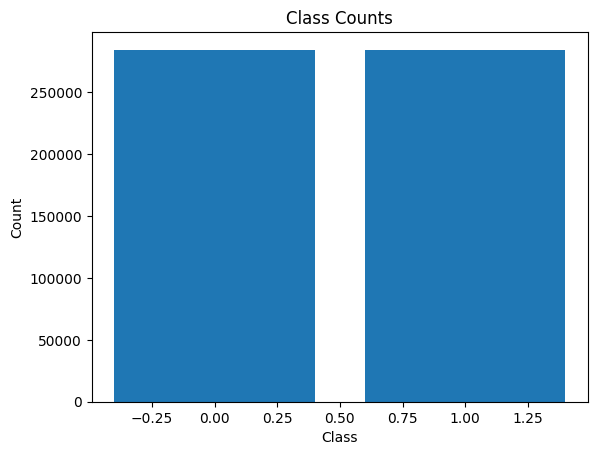

In [14]:
df2 = df.groupby(['Class'])['Class'].count()
class_counts = df.groupby(['Class'])['Class'].count()

# Plot the counts
plt.bar(class_counts.index, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

Data is well distributed.

Save as X and Y for future usage

In [15]:
X = df.drop(columns=['Class'])
Y = df.loc[:, ['Class']]

Exploring distribution of the data

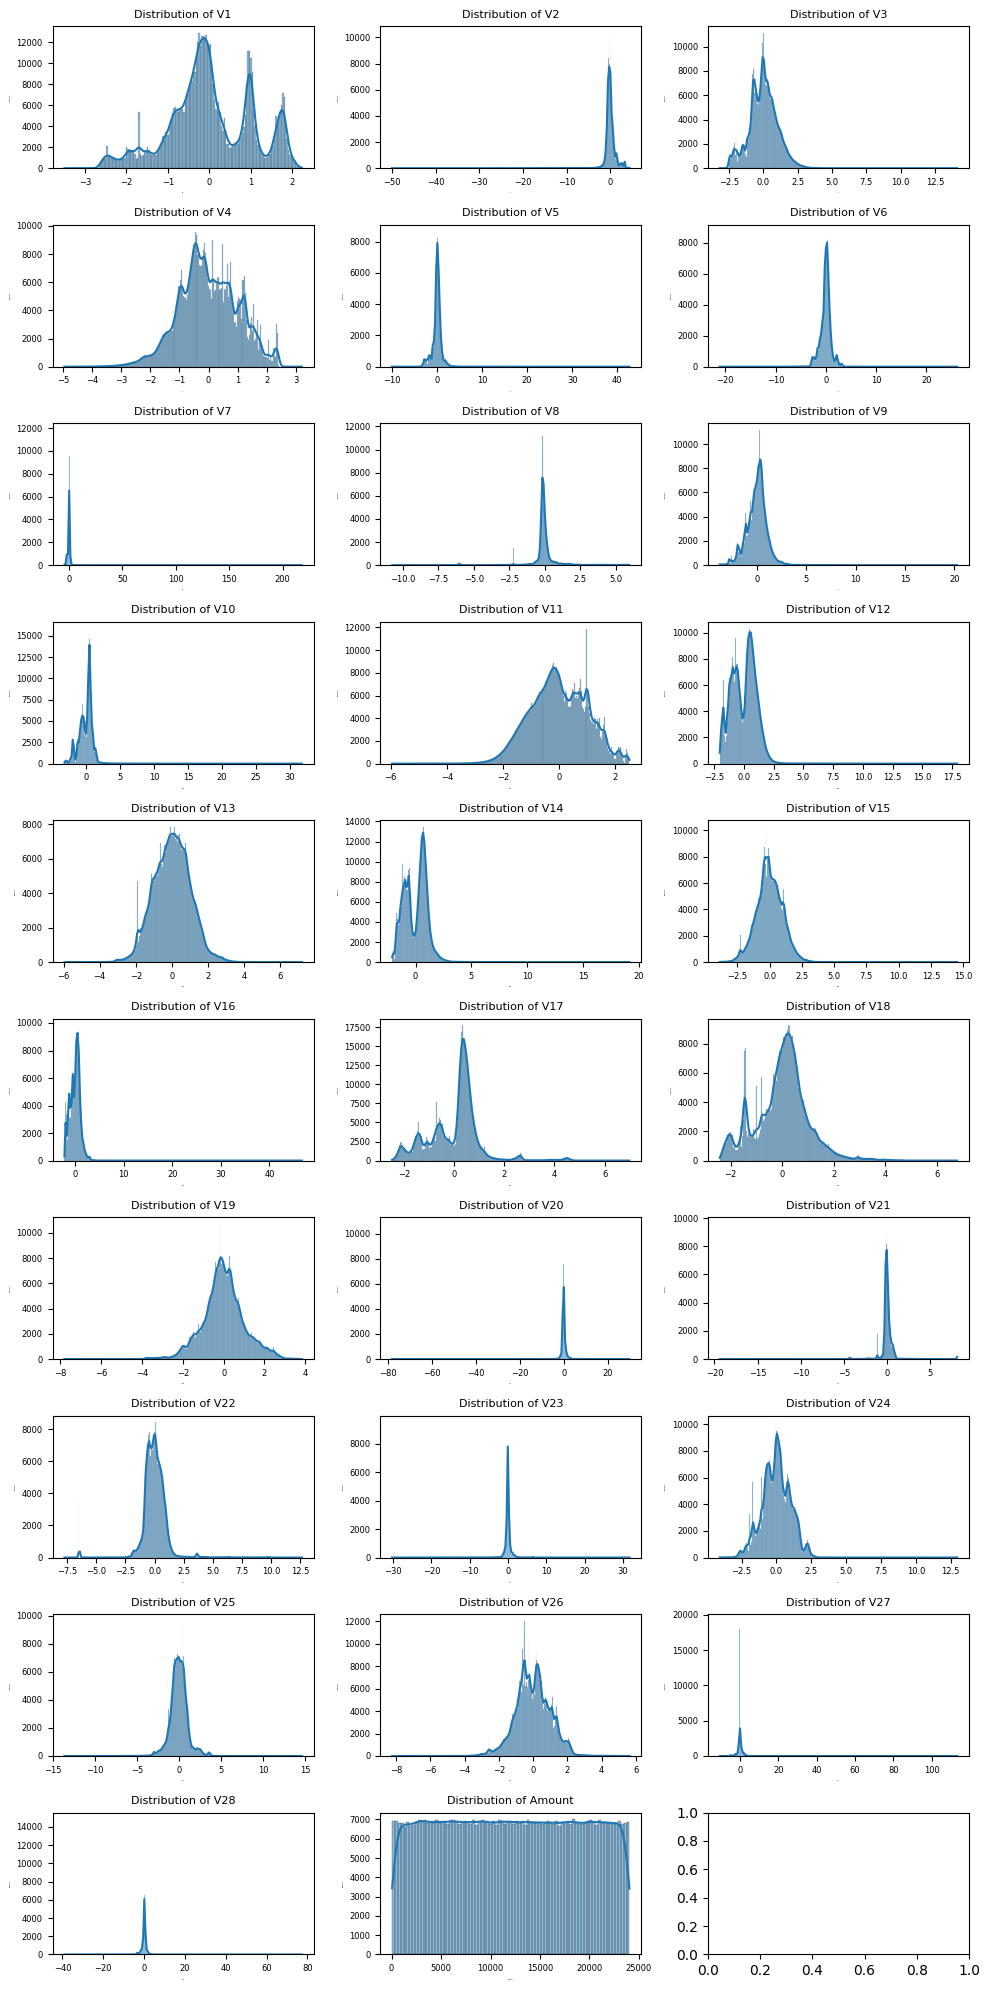

In [30]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 20))

axes = axes.flatten()
for i, column in enumerate(X.columns):
    sns.histplot(X[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}', fontsize=8)
    axes[i].set_xlabel(column, fontsize=0)
    axes[i].set_ylabel('Frequency', fontsize=0)
    axes[i].tick_params(axis='both', labelsize=6)
plt.tight_layout()
plt.show()

In [16]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000


Scale data to see correlation between features

In [17]:
scaler = StandardScaler()
scaler.fit(X)
scaled_df = pd.DataFrame(scaler.transform(X))
scaled_df.columns=X.columns

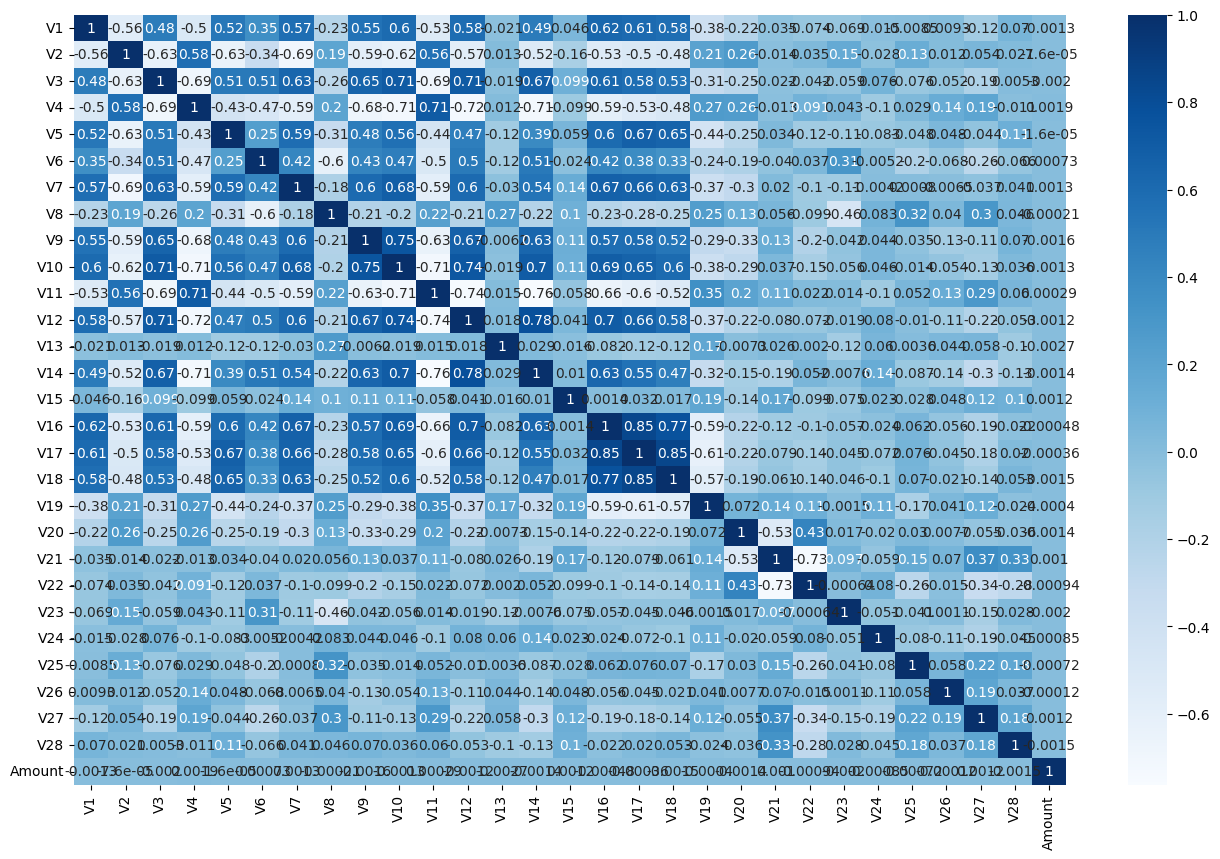

In [18]:
corr_matrix = scaled_df.corr()
plt.figure(figsize=[16,10])
heatmap = sns.heatmap(corr_matrix,cmap='Blues',annot=True)

V16, V17 and V18 are highly correlated

V9, V10 are highly correlated

Drop highly correlated features

V17, V18 and V10

In [19]:
scaled_df = scaled_df.drop(columns = ['V17', 'V18', 'V10'])

Check correlation with target

In [20]:
print(scaled_df.corrwith(df['Class']))

V1       -0.505761
V2        0.491878
V3       -0.682095
V4        0.735981
V5       -0.338639
V6       -0.435088
V7       -0.491234
V8        0.144294
V9       -0.585522
V11       0.724278
V12      -0.768579
V13      -0.071105
V14      -0.805669
V15      -0.037948
V16      -0.573511
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24      -0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
dtype: float64


normal 6:2:2

As data is balanced and large

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, Y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)
print(f"X train shape: ", X_train.shape)
print(f"y train shape: ", y_train.shape)
print(f"X val shape: ", X_val.shape)
print(f"y val shape: ", y_val.shape)
print(f"X test shape: ", X_test.shape)
print(f"y test shape: ", y_test.shape)

X train shape:  (341178, 26)
y train shape:  (341178, 1)
X val shape:  (113726, 26)
y val shape:  (113726, 1)
X test shape:  (113726, 26)
y test shape:  (113726, 1)


Visualize with smaller dataset

In [22]:
input_X = X_train[:math.ceil(len(X_train)*0.1)]
input_y = y_train[:math.ceil(len(X_train)*0.1)]
input_X.shape

(34118, 26)

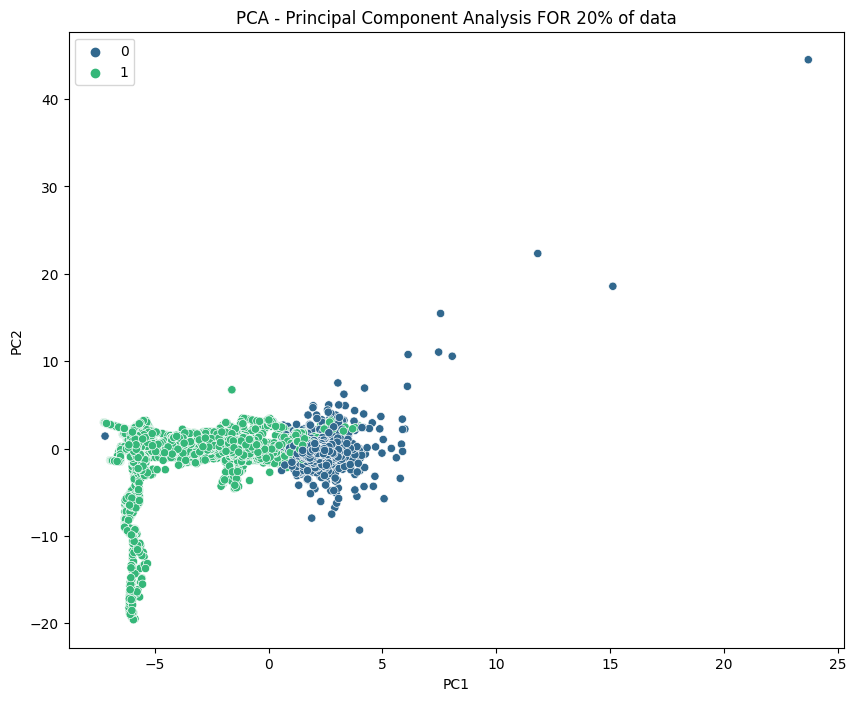

In [18]:
#PCA - Principal Component Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(input_X)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=input_y.values.flatten(), data=pca_df, palette='viridis')
plt.title("PCA - Principal Component Analysis FOR 20% of data")
plt.show()

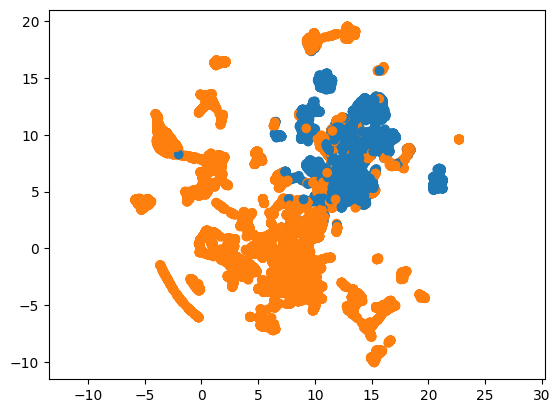

In [24]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(input_X)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in input_y.Class.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')

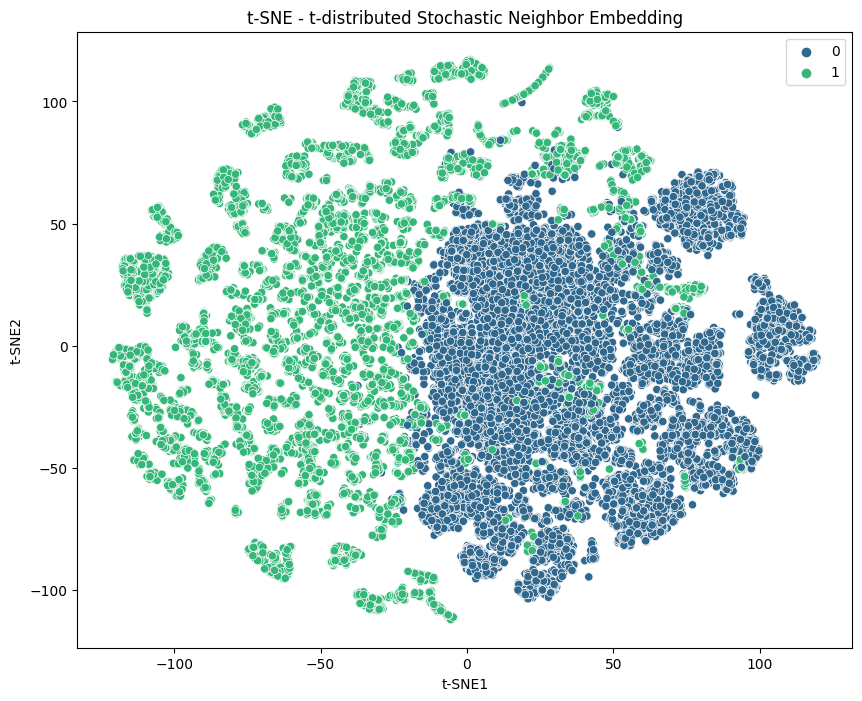

In [19]:
#  t-SNE - t-distributed Stochastic Neighbor Embedding
tsne_model = TSNE(n_components=2)
tsne_result = tsne_model.fit_transform(input_X)
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=input_y.values.flatten(), data=tsne_df, palette='viridis')
plt.title("t-SNE - t-distributed Stochastic Neighbor Embedding")
plt.show()

Use neural network for small set to get optimal hyperparameter such as

Hidden_layer_sizes,

Activation,

Batch_size,

Learning_rate_init,

Max_iter

In [21]:
clf_nn = MLPClassifier(hidden_layer_sizes=2, activation='relu', solver='sgd',
                       batch_size=50, learning_rate_init=0.01, max_iter = 200,
                       validation_fraction = 0.25, early_stopping=True).fit(input_X, np.ravel(input_y))

In [22]:
clf_nn.score(X_test, y_test)

0.9591562175755763

In [28]:
grid_X = X_train[:math.ceil(len(X_train)*0.05)]
grid_y = y_train[:math.ceil(len(X_train)*0.05)]
grid_X.shape

(17059, 26)

In [29]:
param_grid = {
    'hidden_layer_sizes':[(3, 32), (5, 32)],
    'activation':['relu', 'identity', 'logistic', 'tanh'],
    'batch_size':[200, 300],
    'learning_rate_init':[0.01, 0.005],
    'max_iter':[200, 300]
    }

In [30]:
clf_nn_param = MLPClassifier(solver='sgd', validation_fraction = 0.25, early_stopping=True)
grid_search = GridSearchCV(estimator=clf_nn_param, param_grid=param_grid)
grid_search.fit(grid_X, np.ravel(grid_y))

best_params = grid_search.best_params_
print(best_params)

{'activation': 'relu', 'batch_size': 200, 'hidden_layer_sizes': (5, 32), 'learning_rate_init': 0.01, 'max_iter': 300}


Runtime -> try reducing feature

In [ ]:
#dropping high correlated features
#selected_features = univariate_feature
#selected_features.remove('V10')
#selected_features.remove('V17')
#selected_features.remove('V18')

In [ ]:
#choose alternatively
#selected_feature = []
#for i in range(len(model_based_feature)):
#    if univariate_feature[i] not in selected_feature:
#        selected_feature.append(univariate_feature[i])
#    if model_based_feature[i] not in selected_feature:
#        selected_feature.append(model_based_feature[i])
#selected_feature = selected_feature[:17]
#HTML(', '.join(selected_feature))

In [ ]:
#selected_features = selected_features[:11]
#X_selected_features = scaled_df[selected_features]

In [ ]:
#X_train = X_train[selected_feature]
#scaled_df = scaled_df[selected_feature[:-3]]

Try pruning using gridsearchcv

runtime => prune, feature selection

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [5, 10, 20],
    'min_samples_split': [50, 25, 10],
    #'min_samples_leaf': [1, 2, 4]
}
clf2 = RandomForestClassifier(random_state = rng)
grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, np.ravel(y_train))

best_params = grid_search.best_params_

## Train a Random Forest model with the best hyperparameters
#best_rf_model = RandomForestClassifier(**best_params)
#best_rf_model.fit(X_train, y_train)
#
## Make predictions on the validation set
#val_predictions = best_rf_model.predict(X_val)
#
## Evaluate the performance on the validation set
#val_accuracy = accuracy_score(y_val, val_predictions)
#print(f"Validation Accuracy: {val_accuracy}")



In [ ]:
print(best_params)

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 20}


In [ ]:
len(input_X)

68236

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in df.Class.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')

In [ ]:
# UMAP - Uniform Manifold Approximation and Projection
umap_model = UMAP(n_components=2)
umap_result = umap_model.fit_transform(scaled_df)
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue=Y_train.values.flatten(), data=umap_df, palette='viridis')
plt.title("UMAP - Uniform Manifold Approximation and Projection")
plt.show()
#
##  t-SNE - t-distributed Stochastic Neighbor Embedding
#tsne_model = TSNE(n_components=2)
#tsne_result = tsne_model.fit_transform(scaled_df)
#tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
#plt.figure(figsize=(10, 8))
#sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=Y_train.values.flatten(), data=tsne_df, palette='viridis')
#plt.title("t-SNE - t-distributed Stochastic Neighbor Embedding")
#plt.show()

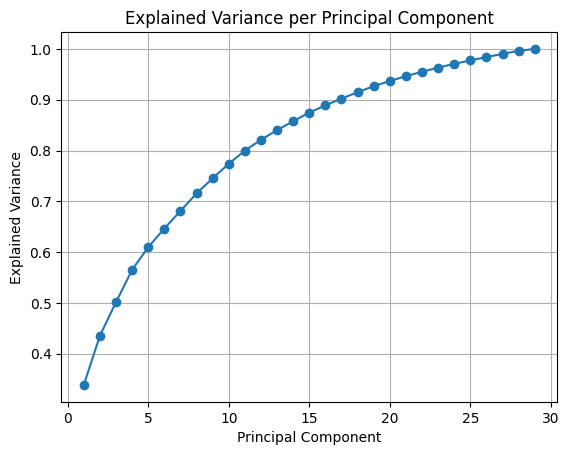

In [ ]:
pca = PCA()
pca.fit(scaled_df)
pca_ratio = np.cumsum(pca.explained_variance_ratio_)

x = range(1, len(pca_ratio) + 1)

plt.plot(x, pca_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance per Principal Component')
plt.grid(True)
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_.round(3))

array([0.339, 0.436, 0.502, 0.565, 0.61 , 0.647, 0.682, 0.716, 0.746,
       0.774, 0.8  , 0.821, 0.84 , 0.857, 0.874, 0.888, 0.901, 0.913,
       0.925, 0.935, 0.945, 0.954, 0.962, 0.969, 0.976, 0.983, 0.989,
       0.995, 0.999])

11 features for 0.8 > threshold

Select 11 features from model based and univariate